## Obtain data

In [1]:
!wget https://d396qusza40orc.cloudfront.net/dataminingcapstone/YelpDataset/yelp_dataset.tar.gz
!tar -xvf /kaggle/working/yelp_dataset.tar.gz

--2024-04-09 12:17:42--  https://d396qusza40orc.cloudfront.net/dataminingcapstone/YelpDataset/yelp_dataset.tar.gz
Resolving d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)... 18.244.193.187, 18.244.193.103, 18.244.193.169, ...
Connecting to d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)|18.244.193.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 443445047 (423M) [application/x-gzip]
Saving to: 'yelp_dataset.tar.gz'

yelp_dataset.tar.gz 100%[===================>] 422.90M  76.8MB/s    in 5.7s    

2024-04-09 12:17:48 (74.8 MB/s) - 'yelp_dataset.tar.gz' saved [443445047/443445047]

yelp_dataset_challenge_academic_dataset/
yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_user.json
yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json
yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_checkin.json
yelp_dataset_challenge_academic_dataset/Dataset_Challenge_Academic_Dataset_Agreement.pdf
yelp_

## Dependencies

In [2]:
!pip install gensim
# !pip install

In [3]:
from gensim import corpora, matutils
from gensim.models import LdaModel
import json
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
import numpy as np
import seaborn as sns

from pyLDAvis import gensim as vg

### preprocessing

In [4]:
# transforming to df
REVIEW_SOURCE = "/kaggle/working/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json"
reviews_df = pd.read_json(REVIEW_SOURCE, lines=True)
# reviews_part_df = reviews_df.sample(frac=0.1, random_state=1875)
reviews_df.head()

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 2, 'cool': 1}",Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,5,2007-05-17,dr. goldberg offers everything i look for in a...,review,vcNAWiLM4dR7D2nwwJ7nCA
1,"{'funny': 0, 'useful': 2, 'cool': 0}",H1kH6QZV7Le4zqTRNxoZow,RF6UnRTtG7tWMcrO2GEoAg,2,2010-03-22,"Unfortunately, the frustration of being Dr. Go...",review,vcNAWiLM4dR7D2nwwJ7nCA
2,"{'funny': 0, 'useful': 1, 'cool': 1}",zvJCcrpm2yOZrxKffwGQLA,-TsVN230RCkLYKBeLsuz7A,4,2012-02-14,Dr. Goldberg has been my doctor for years and ...,review,vcNAWiLM4dR7D2nwwJ7nCA
3,"{'funny': 0, 'useful': 0, 'cool': 0}",KBLW4wJA_fwoWmMhiHRVOA,dNocEAyUucjT371NNND41Q,4,2012-03-02,Been going to Dr. Goldberg for over 10 years. ...,review,vcNAWiLM4dR7D2nwwJ7nCA
4,"{'funny': 0, 'useful': 2, 'cool': 1}",zvJCcrpm2yOZrxKffwGQLA,ebcN2aqmNUuYNoyvQErgnA,4,2012-05-15,Got a letter in the mail last week that said D...,review,vcNAWiLM4dR7D2nwwJ7nCA


In [5]:
rev_lst = reviews_df.text.tolist()

### Task1

### Helper functions

In [6]:
# return a trained ldamodel
def train_lda(lst, num_topics):
    # tfidf vectorize
    tfidfVectorizer = TfidfVectorizer(stop_words='english')
    vec = tfidfVectorizer.fit_transform(lst)

    # lda training
    dictionary = gensim.corpora.Dictionary([tfidfVectorizer.get_feature_names_out()])  
    corpus = matutils.Sparse2Corpus(vec, documents_columns=False)
    lda = gensim.models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics)
    return (lda, corpus, dictionary)

# by gpt: transform list to df
def topics_lst2df(lst):
    topic_ids = []
    weights = []
    words = []

    for item in lst:
        topic_id, word_weights = item
        words_list = word_weights.split(" + ")
        weight_list = []
        word_list = []
        for word_weight in words_list:
            topic_ids.append(topic_id)

            weight, word = word_weight.split("*")
            weight = float(weight[1:])
            word = word.strip('"')
            weights.append(weight)
            words.append(word)

    df = pd.DataFrame({
        'topic_ids': topic_ids,
        'weights': weights,
        'words': words
    })
    return df

# randomly plot 5 words of 5 topics
def plot_topics(lst):
    df = topics_lst2df(lst)
    plot = sns.catplot(data=df, x='words', y='weights', hue='topic_ids', kind='bar')
    plot.set_xticklabels(rotation=90)

In [7]:
!touch /kaggle/working/out.html

In [8]:
import pyLDAvis

the number of topics: 5, which is determined by artificial visualization, minimizing overlap within topics

In [9]:
topic_lda, corpus, dct = train_lda(rev_lst, 4)

In [10]:
data = vg.prepare(topic_lda, corpus, dct)
pyLDAvis.save_html(data, '/kaggle/working/out.html')
# pyLDAvis.display(data, local=True)

### review_topics_vis:
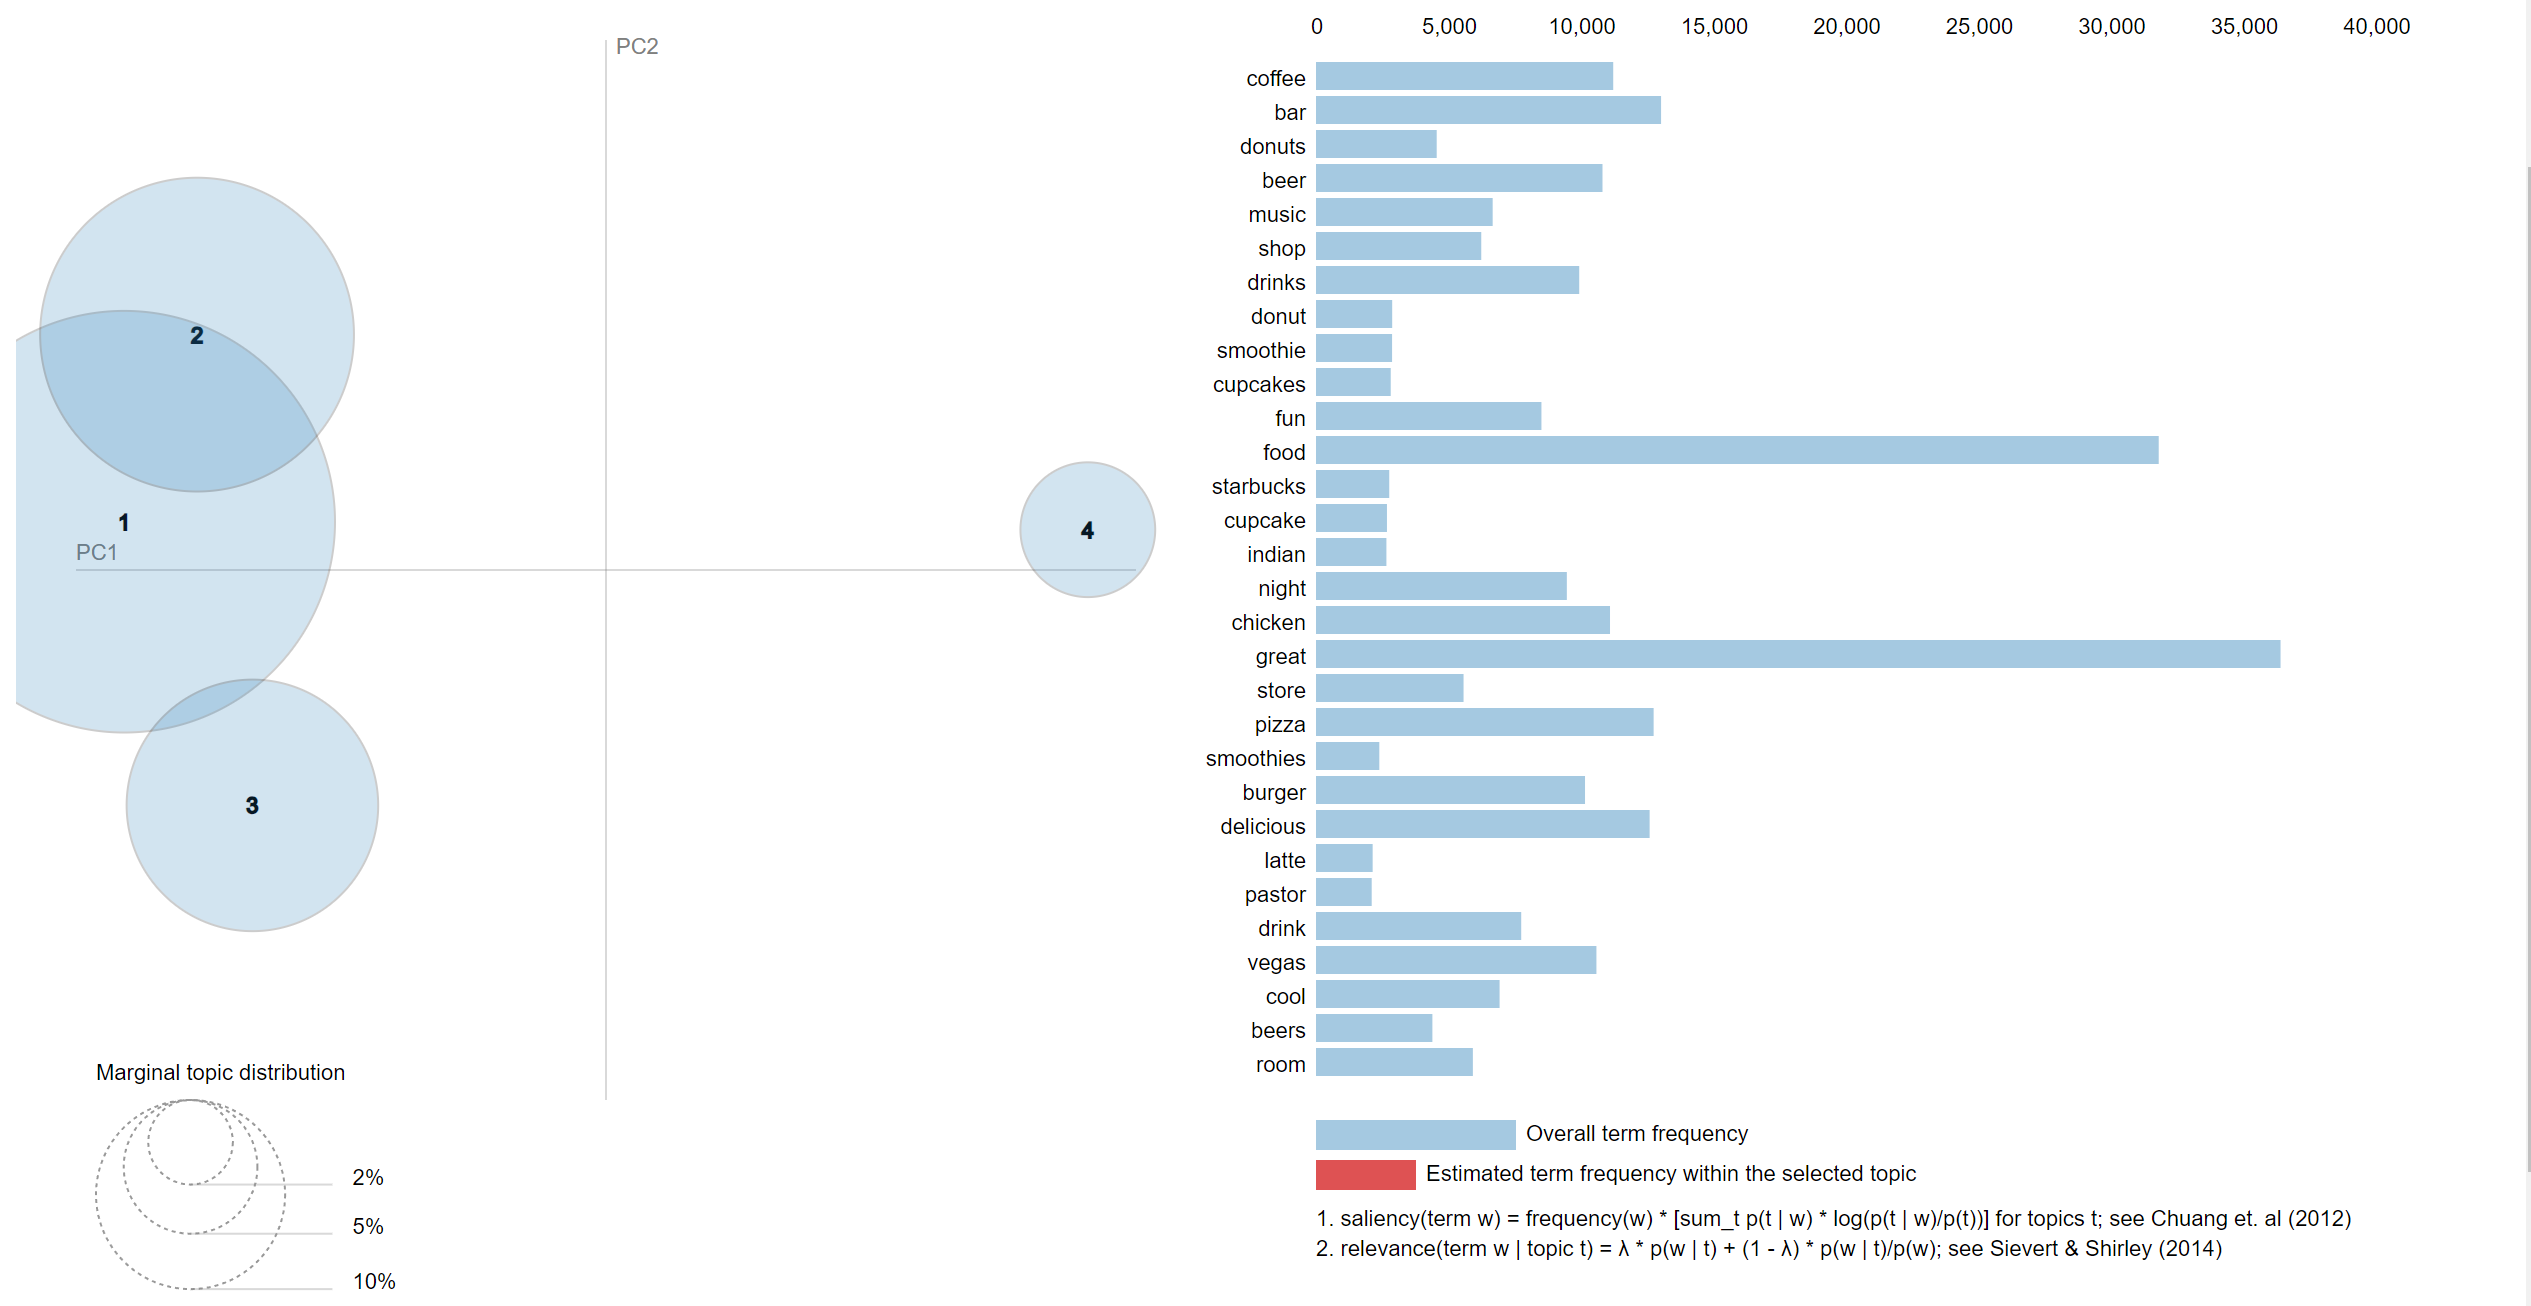
### Finding: 
- Topic1: reflecting a positive evaluation of food quality and dining experiences, indicating a high level of satisfaction and praise for both the cuisine and service.
- Topic2: reflecting positive experiences, interactions, and engagements in various contexts.
- Topic3: reflecting an energetic and vibrant nightlife scene with various entertainment options and amenities available.
- Topic4: reflecting a diverse range of food and beverage items typically found in cafes, bakeries, and grocery stores, with an emphasis on variety and quality.

### Task 2

### filter dataset
- good_reviews: star >= 3
- bad_reviews: star < 3

In [11]:
bad_reviews_df = reviews_df[reviews_df['stars']<3]
good_reviews_df = reviews_df[reviews_df['stars']>=3]

bad_reviews_lst = bad_reviews_df['text'].tolist()
good_reviews_lst = good_reviews_df['text'].tolist()



In [12]:
len(good_reviews_lst)

911949

In [13]:
bad_topics_lda, b_c, b_d = train_lda(bad_reviews_lst, 4)
good_topics_lda, g_c, g_d = train_lda(good_reviews_lst, 4)

In [14]:
!touch /kaggle/working/g.html
!touch /kaggle/working/b.html

In [15]:
data1 = vg.prepare(bad_topics_lda, b_c, b_d)
data2 = vg.prepare(good_topics_lda, g_c, g_d)
pyLDAvis.save_html(data1, '/kaggle/working/b.html')
pyLDAvis.save_html(data2, '/kaggle/working/g.html')

### good_reviews_plot
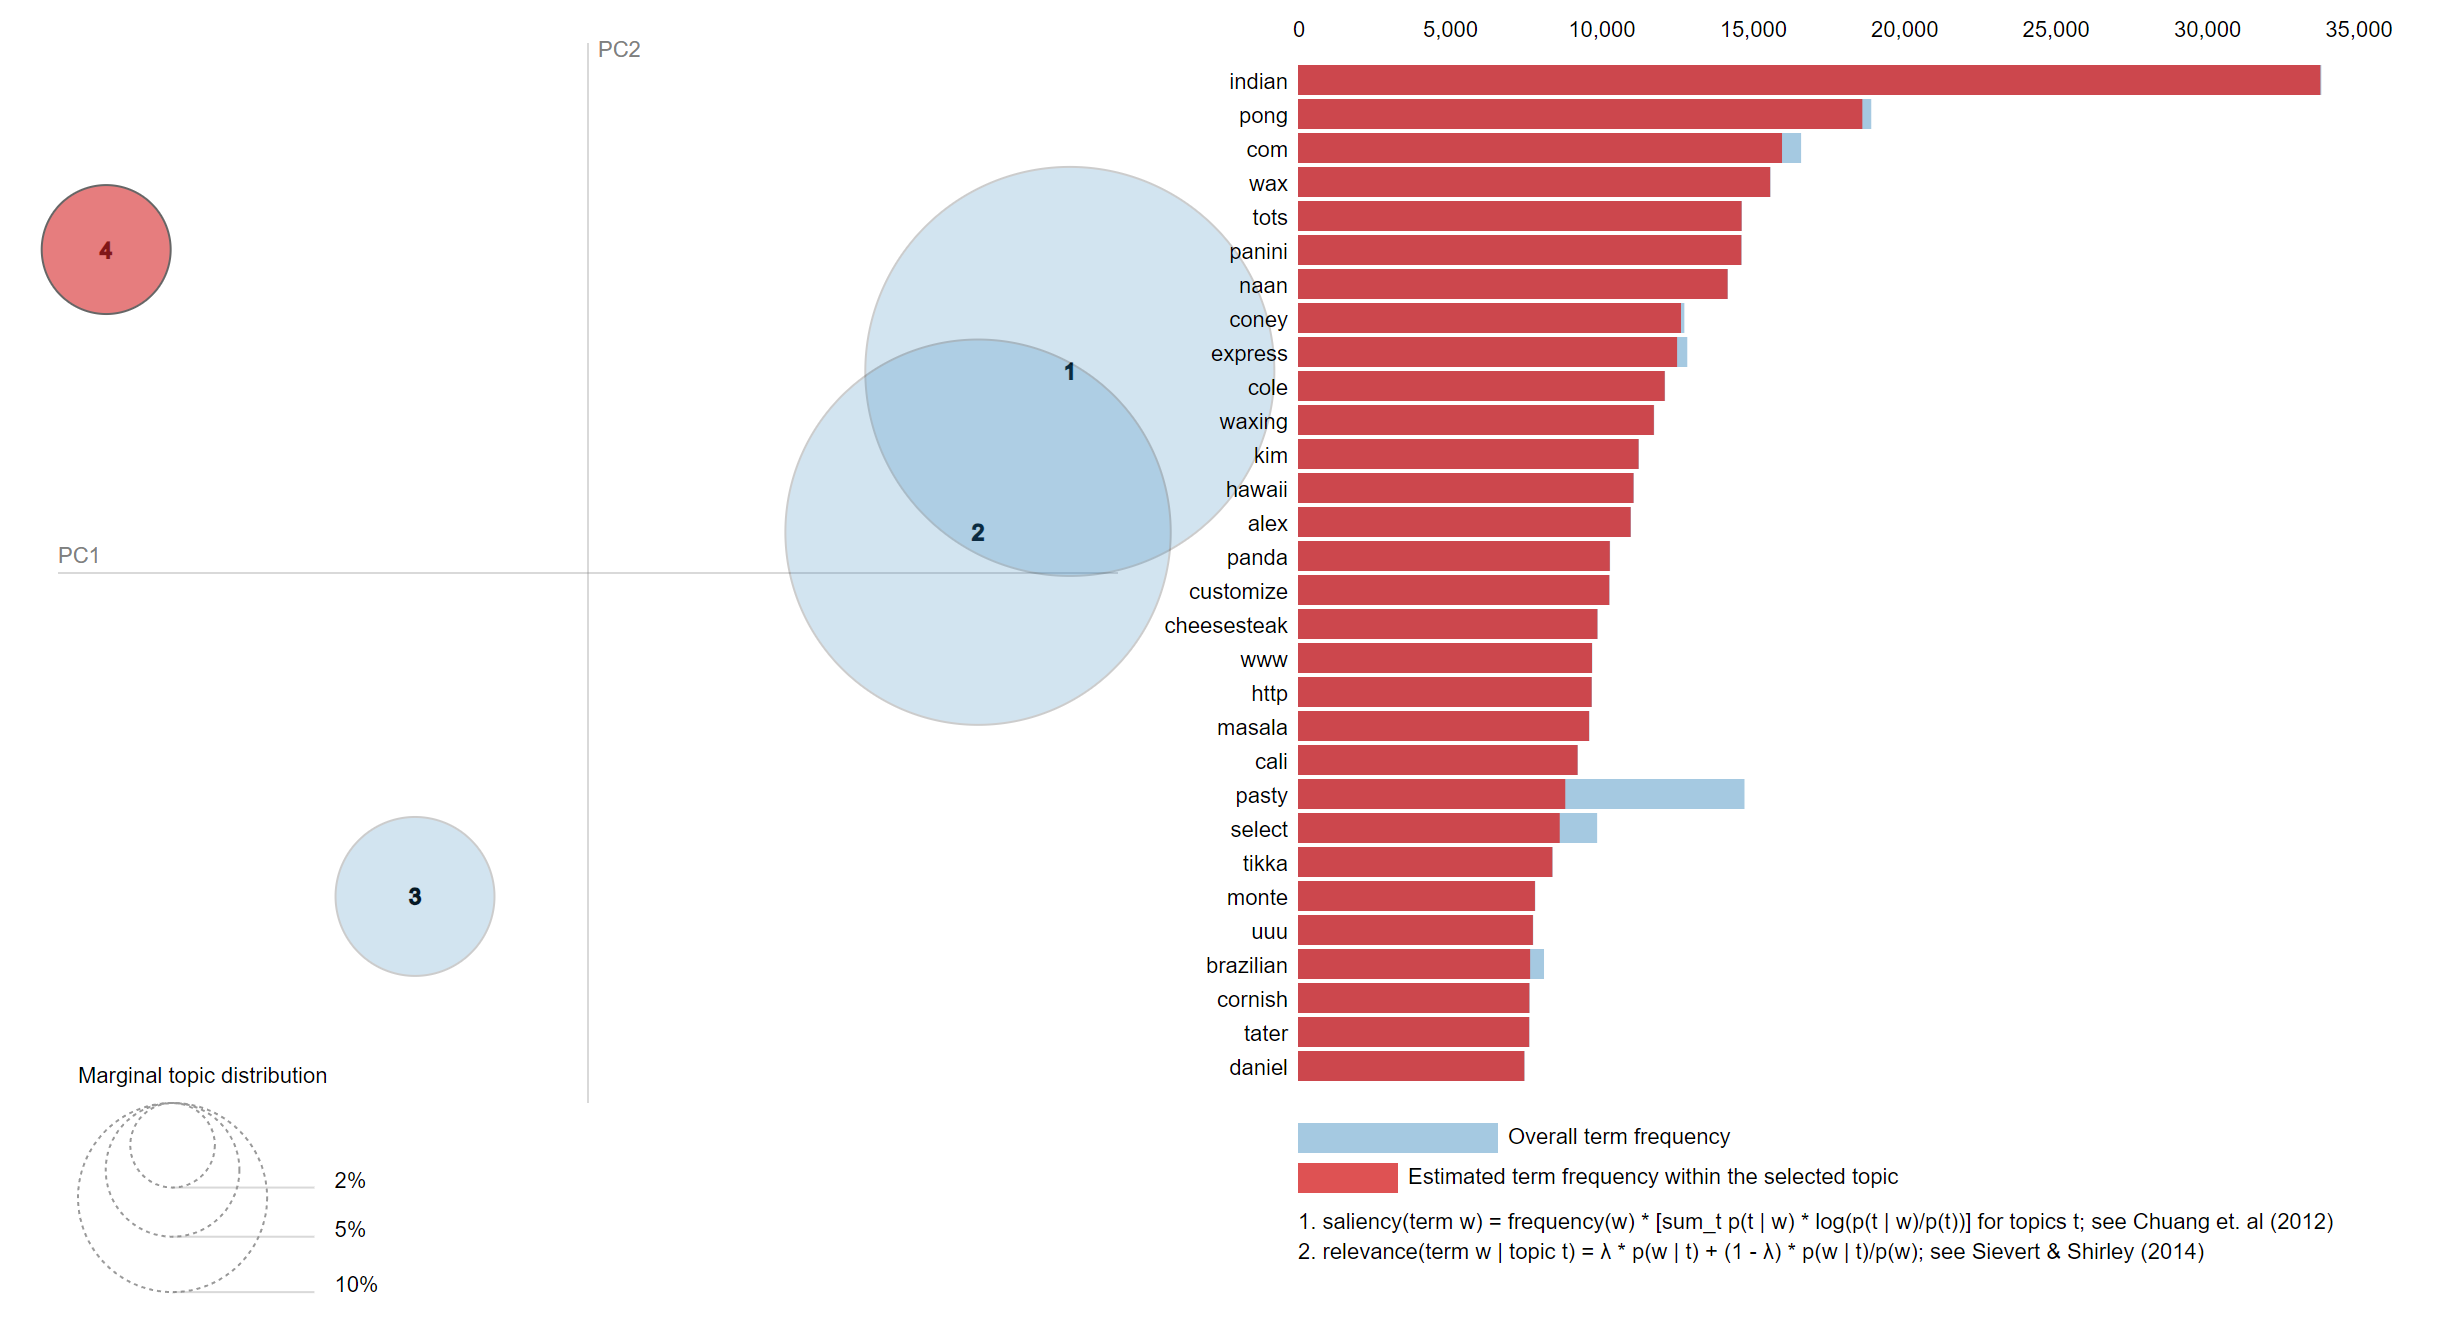
- Topic1: reflecting a range of positive sentiments and experiences associated with dining out.
- Topic2: portraying a range of opinions and experiences related to dining out and food quality.
- Topic3: depicting a range of business, service, and transactional activities within different sectors.
- Topic4: representing a mix of personal names, locations, and food-related terms, possibly reflecting a diverse range in the Internet.

### bad_reviews_plot
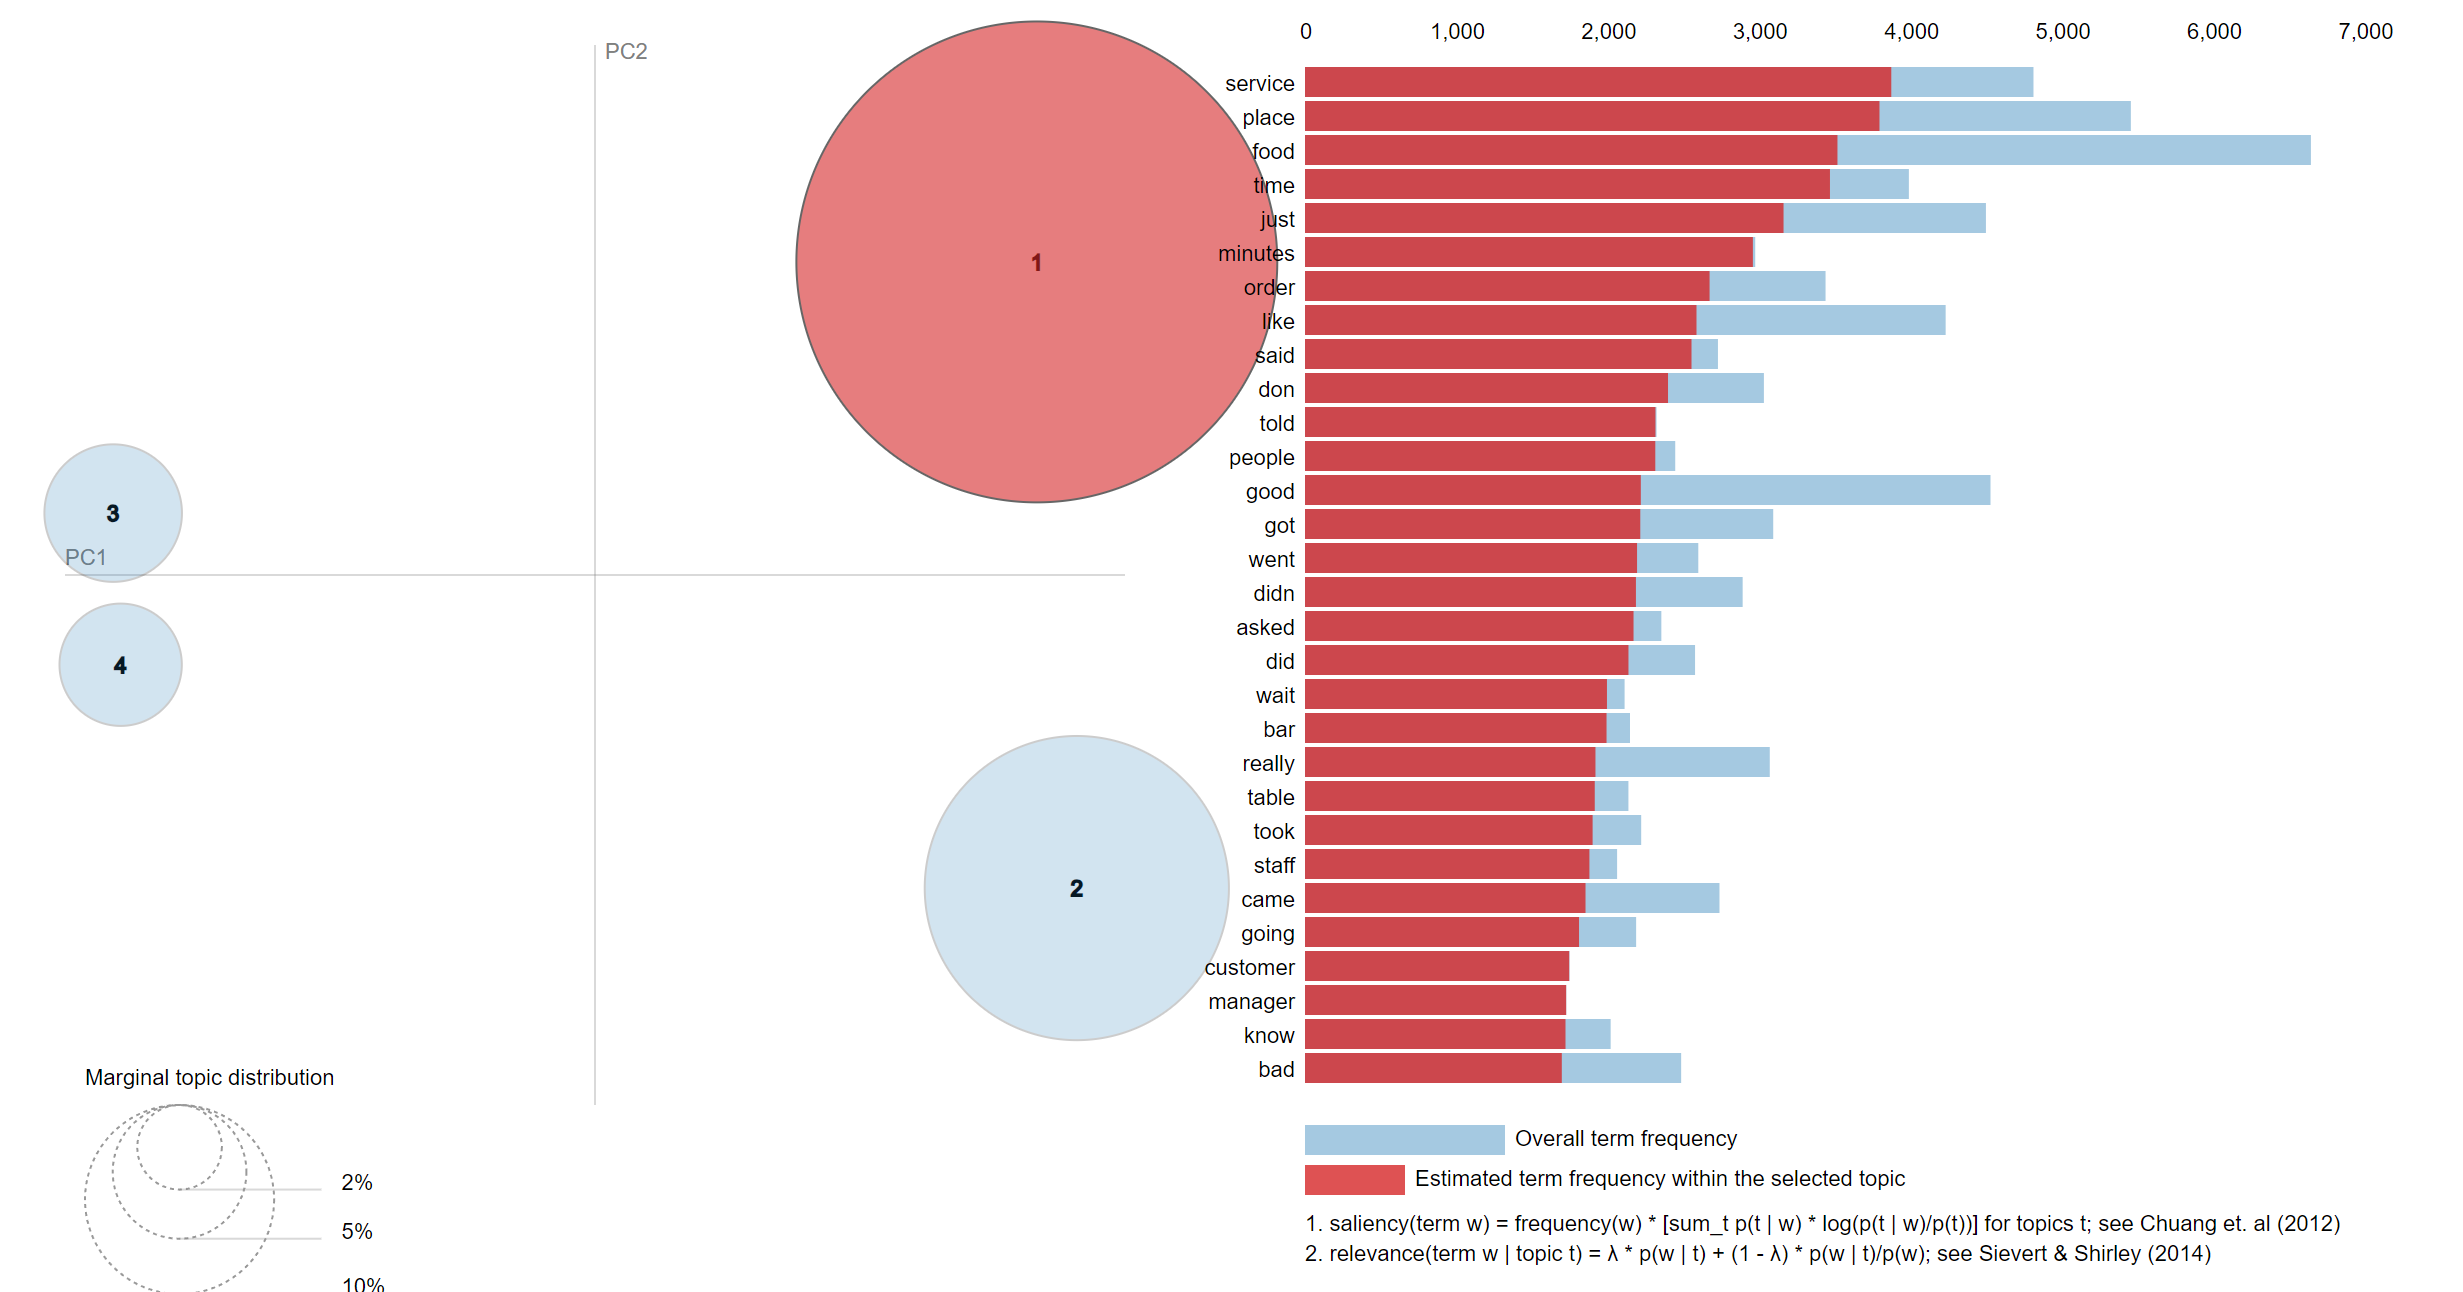
- Topic1: suggesting a focus on customer service, experiences, and interactions, with some mentions of negative aspects.
- Topic2: depicts a range of food preferences and dining experiences, from positive to less satisfying.
- Topic3: reflects diverse aspects of professional and service-oriented interactions in various contexts.
- Topic4: encompasses a range of personal care and unrelated items, possibly indicating varied interests or experiences.